In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


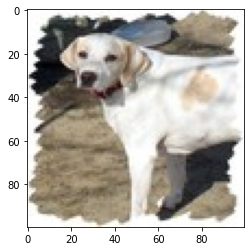

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [12]:
model.fit(X_train,Y_train,epochs=30,batch_size=64)

Epoch 1/30
32/32 [==============================] - 16s 513ms/step - loss: 0.4855 - accuracy: 0.7705
Epoch 2/30
32/32 [==============================] - 18s 562ms/step - loss: 0.4163 - accuracy: 0.8130
Epoch 3/30
32/32 [==============================] - 18s 567ms/step - loss: 0.3815 - accuracy: 0.8290
Epoch 4/30
32/32 [==============================] - 18s 575ms/step - loss: 0.3160 - accuracy: 0.8655
Epoch 5/30
32/32 [==============================] - 16s 491ms/step - loss: 0.2742 - accuracy: 0.8940
Epoch 6/30
32/32 [==============================] - 16s 511ms/step - loss: 0.2293 - accuracy: 0.9145
Epoch 7/30
32/32 [==============================] - 17s 532ms/step - loss: 0.1975 - accuracy: 0.9285
Epoch 8/30
32/32 [==============================] - 19s 582ms/step - loss: 0.1535 - accuracy: 0.9495
Epoch 9/30
32/32 [==============================] - 16s 514ms/step - loss: 0.1465 - accuracy: 0.9515
Epoch 10/30
32/32 [==============================] - 16s 512ms/step - loss: 0.1025 - accura

In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 68ms/step - loss: 1.6751 - accuracy: 0.6850


[1.6751182079315186, 0.6850000023841858]

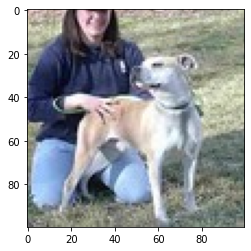

1/1 [==============================] - 0s 25ms/step
Our model says it is a : dog


In [19]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)